### Consider only the below columns and prepare a prediction model for predicting Price.

### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


Model -- model of the car

Price  -- Offer Price in EUROs	

Age_08_04 -- Age in months as in August 2004	

KM -- Accumulated Kilometers on odometer

HP -- Horse Power

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('ToyotaCorolla.csv')

In [6]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [7]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [8]:
len(df)

1436

In [9]:
df.shape

(1436, 38)

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.duplicated().sum()

0

In [12]:
df = df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Price']]

In [23]:
pd.set_option('display.max_columns',None)
df.head()

,age,km,hp,cc,doors,gears,quart_tax,weight,price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [14]:
df.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight', 'Price'],
      dtype='object')

In [15]:
df.head(5)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [16]:
df.shape

(1436, 9)

In [17]:
dict = {'Age_08_04' : 'age',
        'KM' : 'km',
        'HP' : 'hp',
        'Doors' : 'doors',
        'Gears' : 'gears',
        'Quarterly_Tax' : 'quart_tax',
        'Weight' : 'weight',
        'Price' : 'price'}

In [18]:
df.rename(columns=dict,inplace=True)

In [19]:
df.head(2)

,age,km,hp,cc,doors,gears,quart_tax,weight,price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750


In [33]:
df.shape

(1436, 9)

In [22]:
df.describe()

,age,km,hp,cc,doors,gears,quart_tax,weight,price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


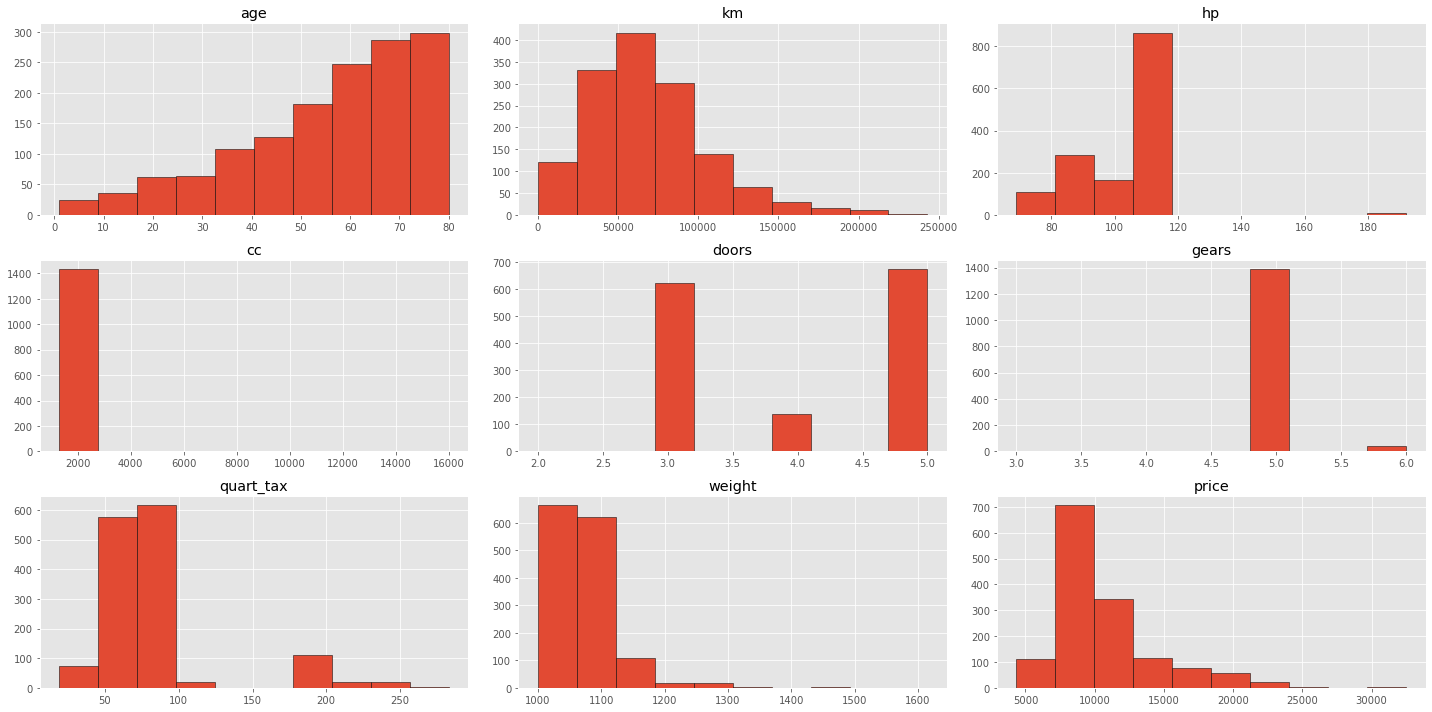

In [34]:
df.hist(edgecolor='k',figsize=(20,10))
plt.tight_layout();

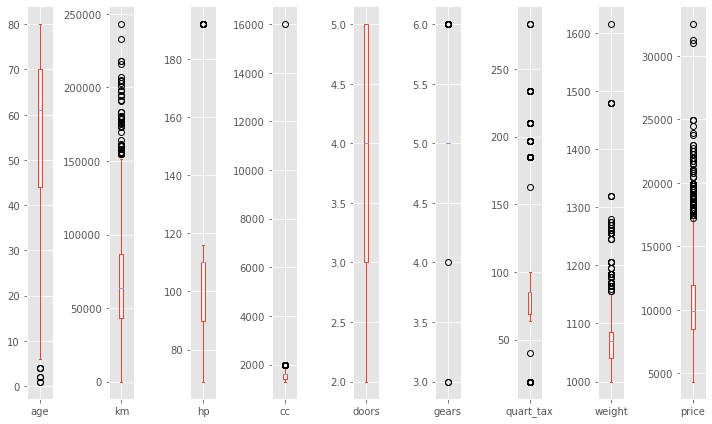

In [21]:
df.plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout();

## <font color='orange'><b>Check for Multicollinearity :

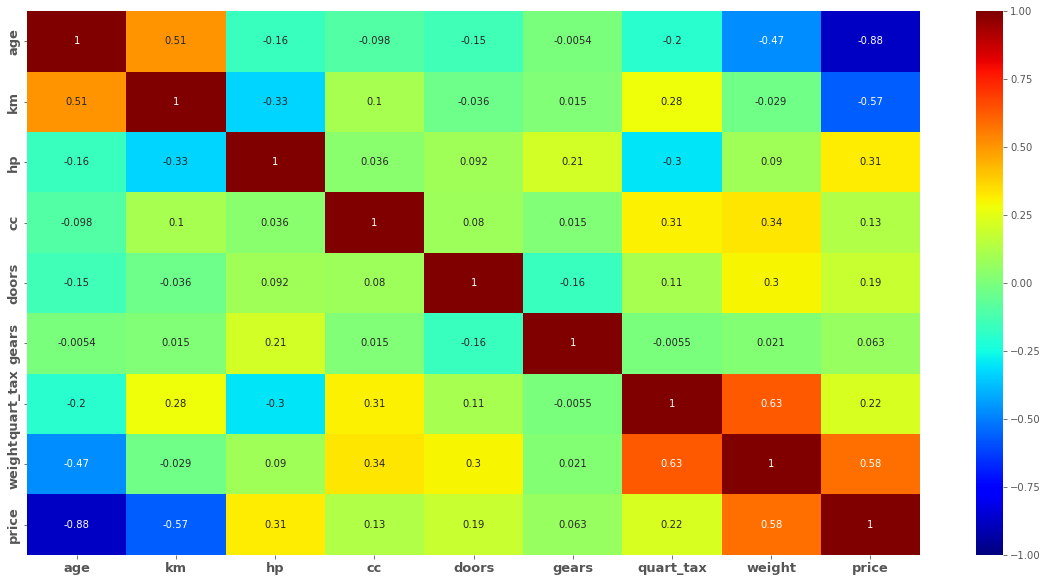

In [48]:
corel = df.corr()
plt.figure(figsize=(20,10))
ax=sns.heatmap(data=corel,annot=True,vmax=1,vmin=-1,cmap='jet')
plt.xticks(fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold');

<font color='maroon'><b>There is no multicollinearity.
    
<font color='maroon'><b><I>Price is strongly negatively correlated to age.
    
<font color='maroon'><b><I>Accumulated kilometers on odometer and price also have negative correlation. Age and km have some positive correlation.
    
<font color='maroon'><b><I>Quaterly tax and weight have some positive correlation.Weight and price also have some positive correlation.    

<Figure size 1440x1440 with 0 Axes>

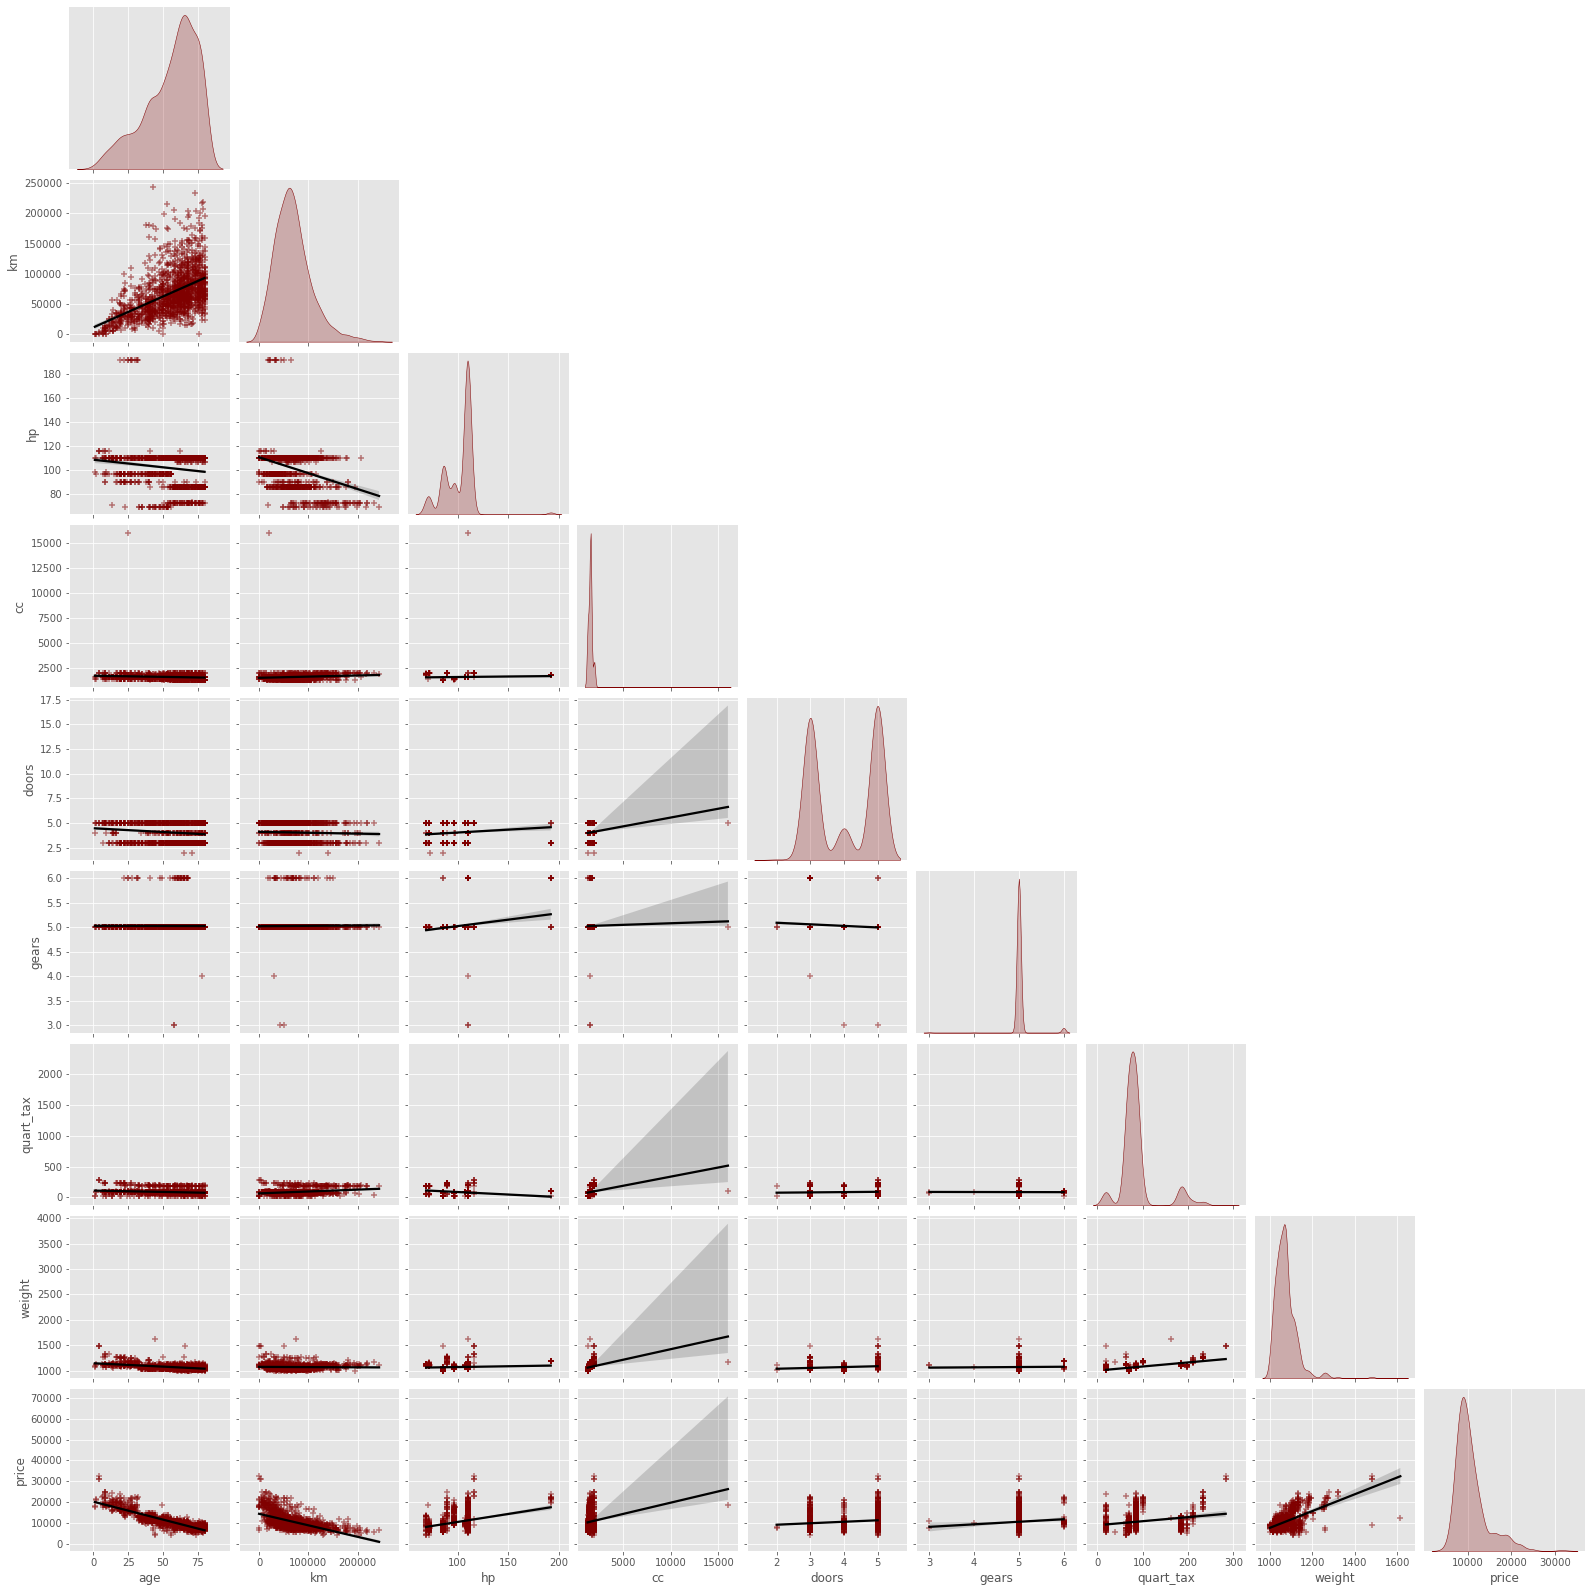

In [218]:
plt.figure(figsize=(20,20))
sns.pairplot(df,markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'black'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': 'maroon'}},
               corner=True,
                 diag_kws= {'color': 'maroon'})
plt.show()

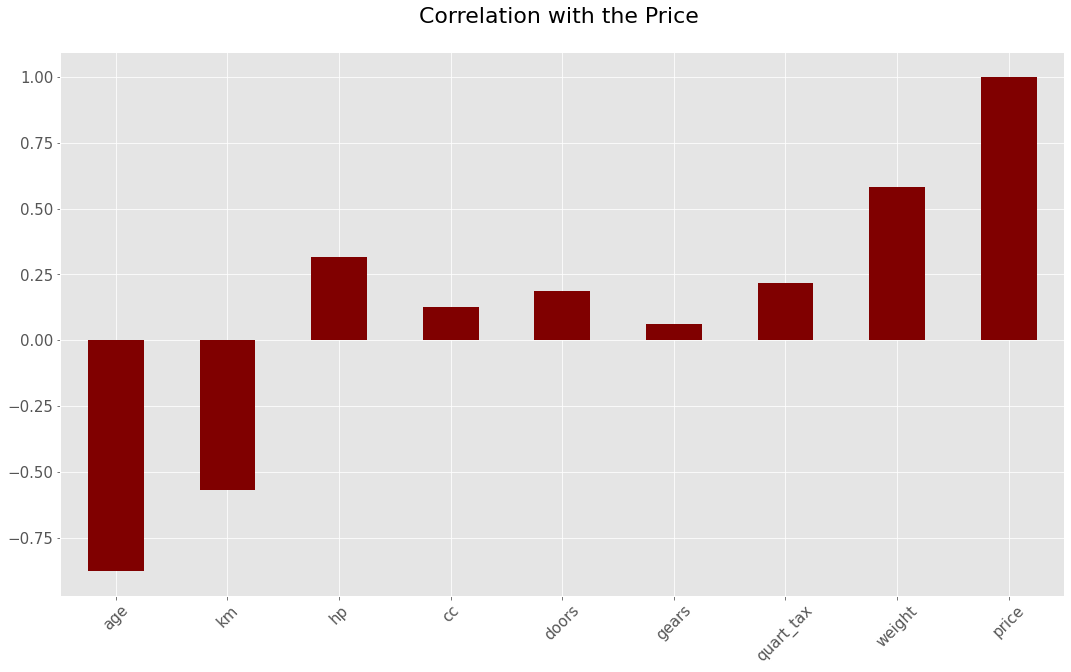

In [217]:
data2 = df.copy()

correlations = data2.corrwith(df.price)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'maroon',
        rot = 45, grid = True)
plt.title('Correlation with the Price \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif");

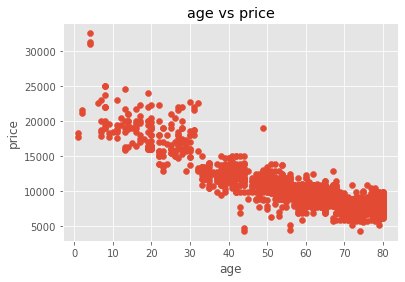

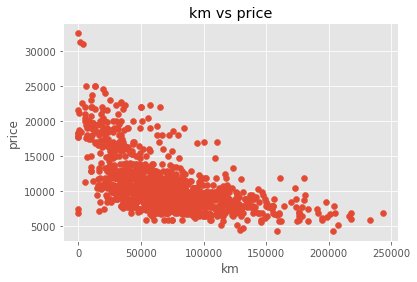

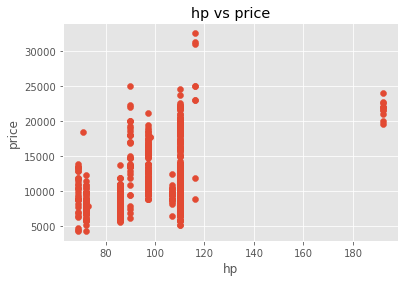

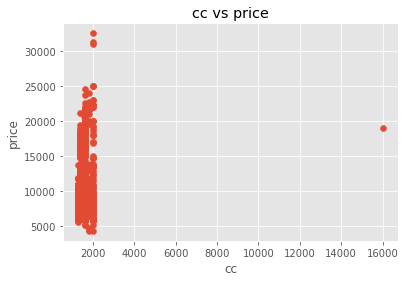

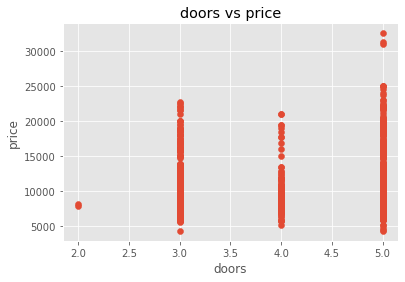

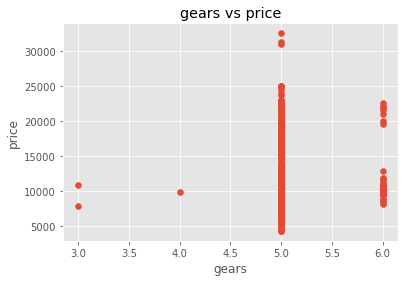

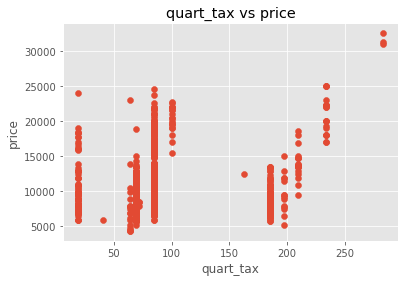

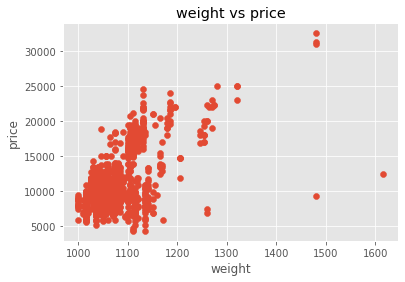

In [55]:
y_col = "price"
x_columns = ["age", "km", "hp","cc","doors","gears","quart_tax","weight"]


for y_col in x_columns:
    
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[y_col], df[x_col])
    ax.set_xlabel(y_col)
    ax.set_ylabel(x_col)
    ax.set_title("{} vs {}".format(y_col, x_col))

    
    plt.show()

<font color='red'><b>Many of the variables have no linear relationship with the target variable.

<font color='maroon'><b>Assumptions of Linear Regression :
    
<font color='maroon'><b><I>-- Linear relationship between the dependent and the independent variables
    
<font color='maroon'><b><I>-- Normally distributed error component
    
<font color='maroon'><b><I>-- No multicollinearity
    
<font color='maroon'><b><I>-- No heteroskedasticity, the variance of residuals must be constant across the predicted values

## <font color='green'><b>Multiple Linear Regression :

### <font color='brown'><b><I>with Raw data :

In [164]:
model_raw = smf.ols('price~age+km+hp+cc+doors+gears+quart_tax+weight',data=df).fit()

In [165]:
print(model_raw.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:46:31   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.0

## <font color='orange'><b>Residual Analysis :

In [184]:
import statsmodels.api as sm

df_pred = df.copy()
df_pred = sm.add_constant(x)
df_pred['predicted_price'] = model_raw.predict(x).round(2)
df_pred = df_pred.join(y)
df_pred = df_pred.iloc[:,[0,1,2,3,4,5,6,7,8,10,9]]
df_pred['error/residuals'] = df_pred['predicted_price']-df_pred['price']
df_pred.head()

,const,age,km,hp,cc,doors,gears,quart_tax,weight,price,predicted_price,error/residuals
0,1.0,23,46986,90,2000,3,5,210,1165,13500,16812.58,3312.58
1,1.0,23,72937,90,2000,3,5,210,1165,13750,16272.36,2522.36
2,1.0,24,41711,90,2000,3,5,210,1165,13950,16800.73,2850.73
3,1.0,26,48000,90,2000,3,5,210,1165,14950,16426.50,1476.50
4,1.0,30,38500,90,2000,3,5,210,1170,13750,16222.42,2472.42


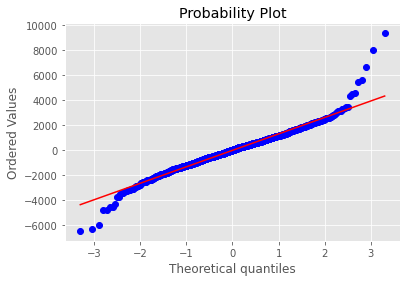

In [185]:
from scipy import stats
stats.probplot(df_pred['error/residuals'],dist='norm',plot=plt);

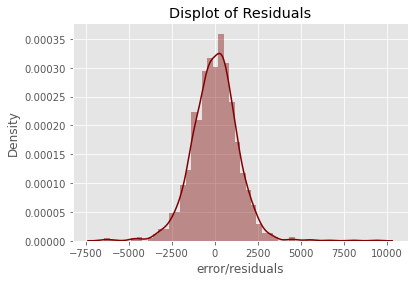

In [186]:
sns.distplot(df_pred['error/residuals'],kde=True,color='maroon')
plt.title('Displot of Residuals');

<font color='maroon'><b>So the error component is normally distributed.

## <font color='orange'><b>Check for Homoscedasticity :

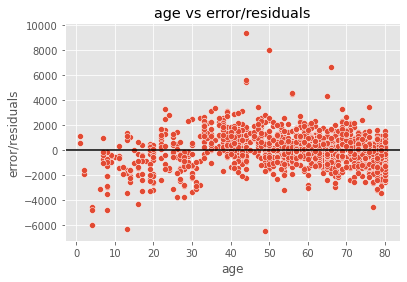

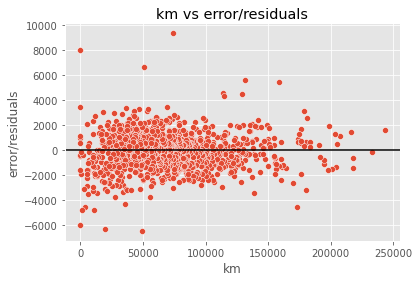

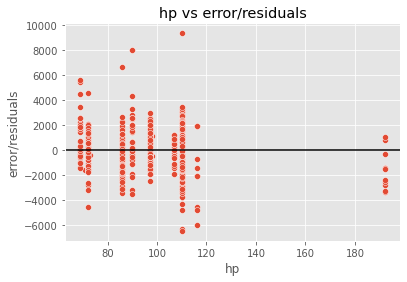

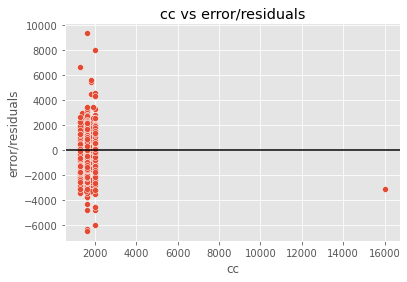

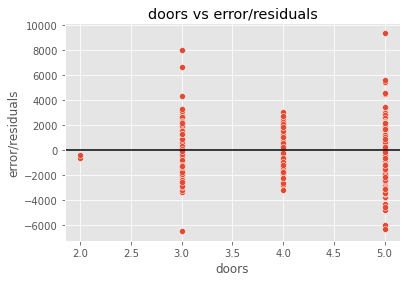

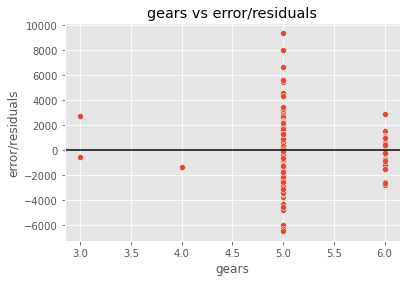

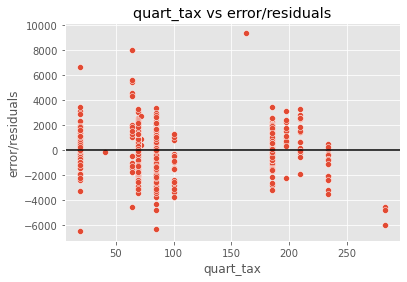

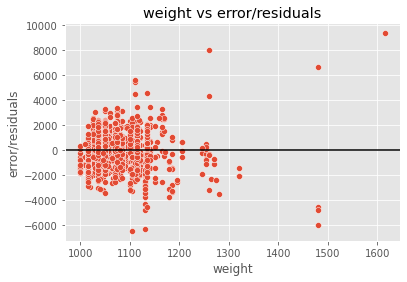

In [215]:
plt.title('age vs error/residuals')
sns.scatterplot(data=df_pred,x='age',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()
plt.title('km vs error/residuals')
sns.scatterplot(data=df_pred,x='km',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()
plt.title('hp vs error/residuals')
sns.scatterplot(data=df_pred,x='hp',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()
plt.title('cc vs error/residuals')
sns.scatterplot(data=df_pred,x='cc',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()
plt.title('doors vs error/residuals')
sns.scatterplot(data=df_pred,x='doors',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()
plt.title('gears vs error/residuals')
sns.scatterplot(data=df_pred,x='gears',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()
plt.title('quart_tax vs error/residuals')
sns.scatterplot(data=df_pred,x='quart_tax',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()
plt.title('weight vs error/residuals')
sns.scatterplot(data=df_pred,x='weight',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()

<font color='maroon'><b>There is no specific pattern in the error values against the fitted values.There is constant variance.So the model satisfies the assumption of homoscedasticity.

### <font color='magenta'><b>As all the predictor variables are satisfying the linearity condition we can use Cook's Distance to find the influence points :

In [310]:
df_c = df.copy()
influence = model_raw.get_influence()
(c,_) = influence.cooks_distance
influence_df = pd.DataFrame(c,columns=['influence'])
influence_df.index = df_c.index
cooks_df = df_c.merge(influence_df,left_index=True,right_index=True)

In [258]:
cooks_df.head()

,age,km,hp,cc,doors,gears,quart_tax,weight,price,influence
0,23,46986,90,2000,3,5,210,1165,13500,0.007237
1,23,72937,90,2000,3,5,210,1165,13750,0.003968
2,24,41711,90,2000,3,5,210,1165,13950,0.005465
3,26,48000,90,2000,3,5,210,1165,14950,0.001406
4,30,38500,90,2000,3,5,210,1170,13750,0.004124


In [253]:
cooks_threshold = 4/len(df_c)
cooks_outliers = cooks_df[cooks_df['influence'] > cooks_threshold]
print('Outliers:',len(cooks_outliers))
print(f'This is {len(cooks_outliers)/len(df_c)*100}% of our dataset')

Outliers: 78
This is 5.43175487465181% of our dataset


<font color='maroon'><b><I>The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1.

In [273]:
cooks_outliers.loc[(cooks_outliers['influence']>0.5)]

,age,km,hp,cc,doors,gears,quart_tax,weight,price,influence
80,25,20019,110,16000,5,5,100,1180,18950,79.520106
221,44,74172,110,1600,5,5,163,1615,12450,1.021031
960,66,50806,86,1300,3,5,19,1480,9390,0.605000


### <font color='purple'><b>Visualizing the High Leverage Point :

In [248]:
from statsmodels.graphics.regressionplots import influence_plot

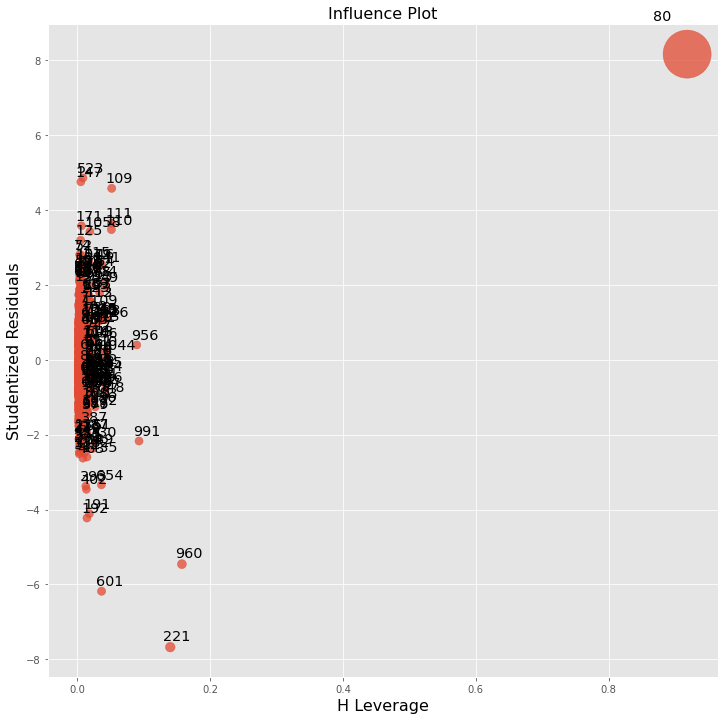

In [266]:
fig,ax = plt.subplots(figsize=(12,12))
fig = sm.graphics.influence_plot(model_raw, ax=ax)
plt.show()

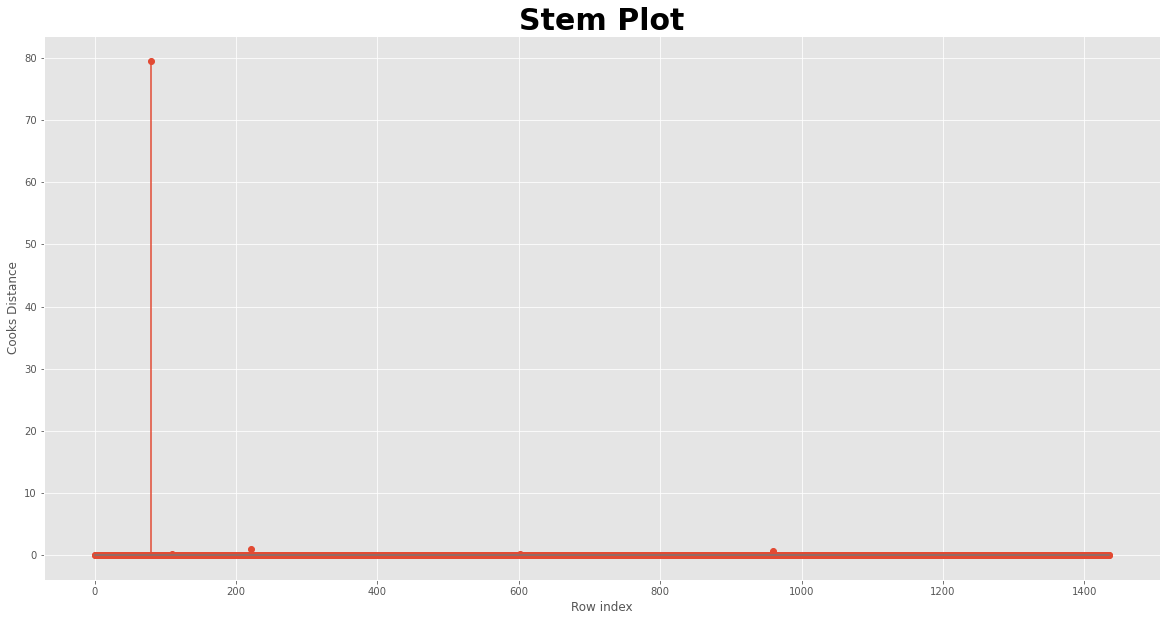

In [279]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(df_c)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.title('Stem Plot',fontsize=30,fontweight='bold')
plt.show()

### <font color='purple'><b><I>Removing the High Leverage Point :

In [311]:
df_c.drop(index=80,inplace=True)

In [284]:
cooks_outliers.drop(index=80,inplace=True)

### <font color='purple'><b><I>Replacing the other two High Influence Points with their nearest value :

In [285]:
cooks_outliers.loc[(cooks_outliers['influence']>0.5)]

,age,km,hp,cc,doors,gears,quart_tax,weight,price,influence
221,44,74172,110,1600,5,5,163,1615,12450,1.021031
960,66,50806,86,1300,3,5,19,1480,9390,0.605000


In [283]:
df_c.describe()

,age,km,hp,cc,doors,gears,quart_tax,weight,price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,55.968641,68567.067596,101.496167,1566.804878,4.032753,5.026481,87.113589,1072.384669,10725.096864
std,18.588504,37497.629827,14.984621,187.245640,0.952667,0.188575,41.141543,52.582788,3621.726584
min,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000,8450.000000
50%,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000,9900.000000
75%,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000,11950.000000
max,80.000000,243000.000000,192.000000,2000.000000,5.000000,6.000000,283.000000,1615.000000,32500.000000


<font color='purple'><b><I>From the above information on data, quart_tax=19 at index 960 and weight=1615 are the extreme ones which need to be replaced with their nearest percentile values.

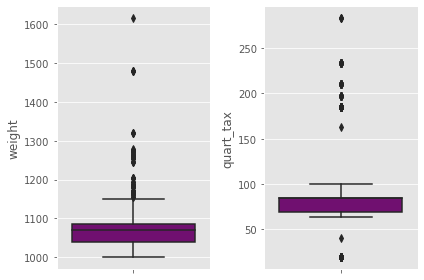

In [290]:
fig,axes = plt.subplots(1,2)
sns.boxplot(data=df_c,y='weight',color='purple',ax=axes[0])
sns.boxplot(data=df_c,y='quart_tax',color='purple',ax=axes[1])
plt.tight_layout();

In [302]:
print('99.90% quantile for weight:',df_c['weight'].quantile(0.9990))

99.90% quantile for weight: 1480.0


In [303]:
print('5% quantile for quart_tax:',df_c['quart_tax'].quantile(0.05))

5% quantile for quart_tax: 33.70000000000006


In [314]:
df_c.at[221,'weight'] = 1480.0
df_c.at[960,'quart_tax'] = 33.7

In [318]:
df_c.describe()

,age,km,hp,cc,doors,gears,quart_tax,weight,price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,55.968641,68567.067596,101.496167,1566.804878,4.032753,5.026481,87.123833,1072.290592,10725.096864
std,18.588504,37497.629827,14.984621,187.245640,0.952667,0.188575,41.126399,51.725079,3621.726584
min,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000,8450.000000
50%,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000,9900.000000
75%,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000,11950.000000
max,80.000000,243000.000000,192.000000,2000.000000,5.000000,6.000000,283.000000,1480.000000,32500.000000


### <font color='brown'><b><I>After Removing Influencers :

In [319]:
model_infl = smf.ols('price~age+km+hp+cc+doors+gears+quart_tax+weight',data=df_c).fit()

In [320]:
print(model_infl.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1219.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:12:22   Log-Likelihood:                -12318.
No. Observations:                1435   AIC:                         2.465e+04
Df Residuals:                    1426   BIC:                         2.470e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7912.1006   1394.685     -5.673      0.0

### <font color='magenta'><b>Lasso Regression : <I>(L1 Regularization)

In [324]:
x_l = df_c.drop(['price'],axis=1)
y_l = df_c['price']

In [328]:
from sklearn.linear_model import Lasso

In [329]:
lasso = Lasso(alpha=1.0)

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
x_train,x_test,y_train,y_test = train_test_split(x_l,y_l,test_size=0.3,random_state=0)

In [332]:
lasso.fit(x_train,y_train)

Lasso()

In [333]:
y_pred = lasso.predict(x_test)

In [334]:
from sklearn.metrics import r2_score

In [336]:
r_squared = r2_score(y_pred,y_test)
r_squared

0.8554594148569976

In [338]:
adj_r2 = 1-(1-r2_score(y_pred,y_test))*(len(y)-1)/(len(y)-x.shape[1]-1)
adj_r2

0.8546490962297068

### <font color='brown'><b><I>With Box-Cox Transformation :

In [230]:
df2 = df_c.copy()

In [343]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer 

#Box-Cox Transform
column_trans = ColumnTransformer(
    [('age', PowerTransformer(method='box-cox', standardize=True), ['age']),
     ('km', PowerTransformer(method='box-cox', standardize=True), ['km']),
     ('hp', PowerTransformer(method='box-cox', standardize=True), ['hp']),
     ('cc', PowerTransformer(method='box-cox', standardize=True), ['cc']),
     ('doors', PowerTransformer(method='box-cox', standardize=True), ['doors']),
     ('gears', PowerTransformer(method='box-cox', standardize=True), ['gears']),
     ('quart_tax', PowerTransformer(method='box-cox', standardize=True), ['quart_tax']),
     ('weight', PowerTransformer(method='box-cox', standardize=True), ['weight']),
    ])

transformed_boxcox = column_trans.fit_transform(df2)

df_bc = pd.DataFrame(transformed_boxcox, columns=x.columns)

df_bc.head()

,age,km,hp,cc,doors,gears,quart_tax,weight
0,-1.674840,-0.480804,-0.758343,1.858951,-1.089083,-0.12804,2.436554,-1.387779e-17
1,-1.674840,0.245966,-0.758343,1.858951,-1.089083,-0.12804,2.436554,-1.387779e-17
2,-1.641377,-0.649748,-0.758343,1.858951,-1.089083,-0.12804,2.436554,-1.387779e-17
3,-1.571642,-0.449351,-0.758343,1.858951,-1.089083,-0.12804,2.436554,-1.387779e-17
4,-1.421273,-0.757447,-0.758343,1.858951,-1.089083,-0.12804,2.436554,-1.387779e-17


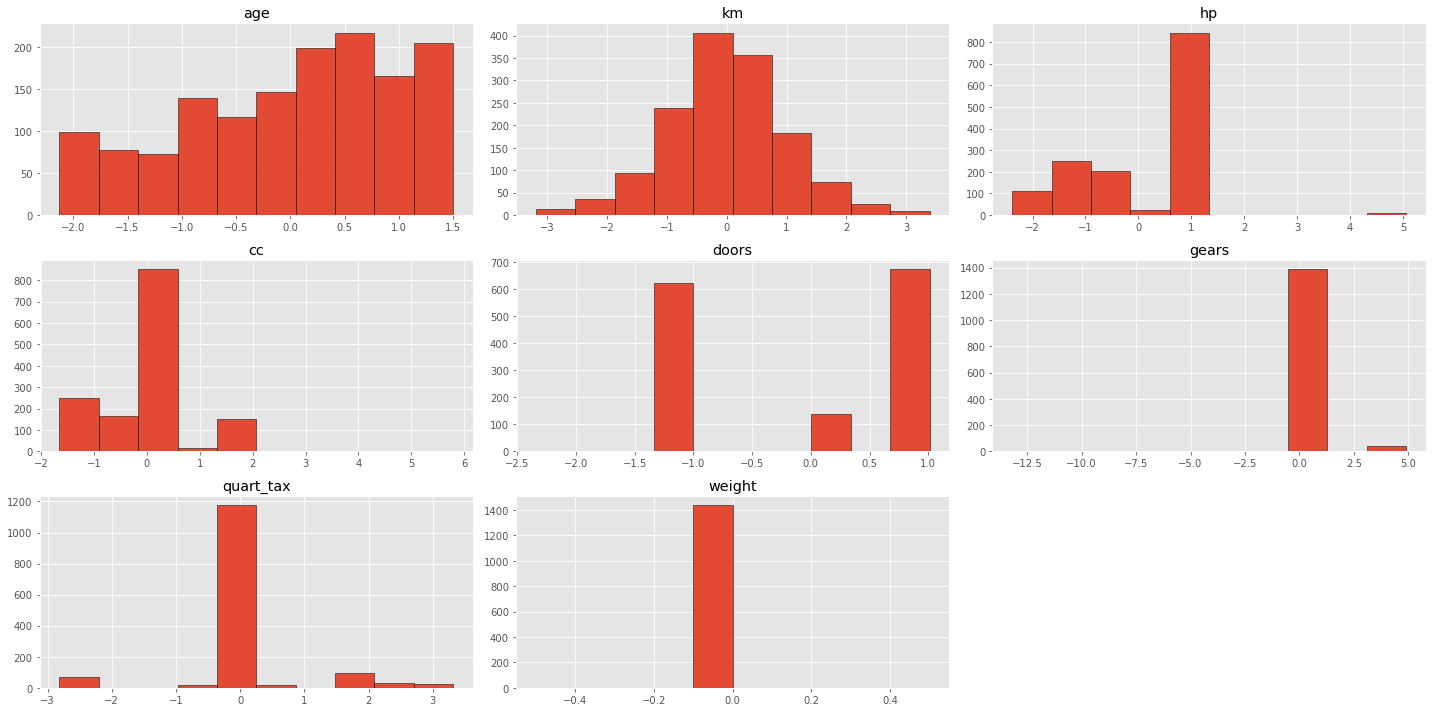

In [344]:
df_bc.hist(edgecolor='k',figsize=(20,10))
plt.tight_layout();

In [345]:
df_bc = df_bc.join(y_l)
df_bc.head()

,age,km,hp,cc,doors,gears,quart_tax,weight,price
0,-1.674840,-0.480804,-0.758343,1.858951,-1.089083,-0.12804,2.436554,-1.387779e-17,13500.0
1,-1.674840,0.245966,-0.758343,1.858951,-1.089083,-0.12804,2.436554,-1.387779e-17,13750.0
2,-1.641377,-0.649748,-0.758343,1.858951,-1.089083,-0.12804,2.436554,-1.387779e-17,13950.0
3,-1.571642,-0.449351,-0.758343,1.858951,-1.089083,-0.12804,2.436554,-1.387779e-17,14950.0
4,-1.421273,-0.757447,-0.758343,1.858951,-1.089083,-0.12804,2.436554,-1.387779e-17,13750.0


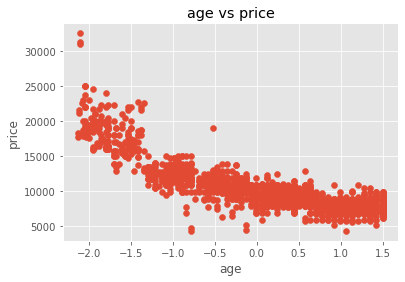

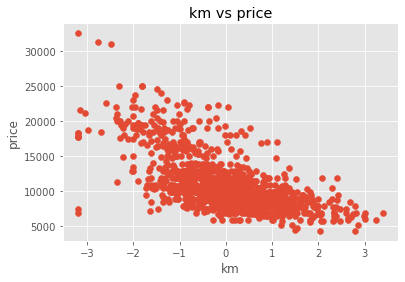

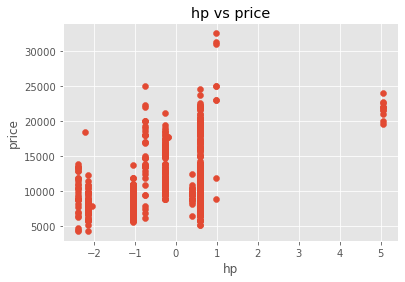

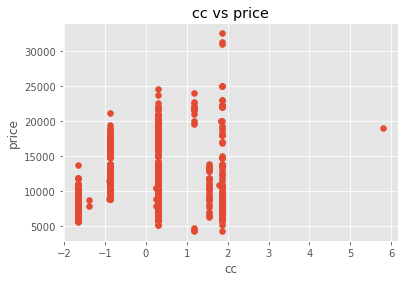

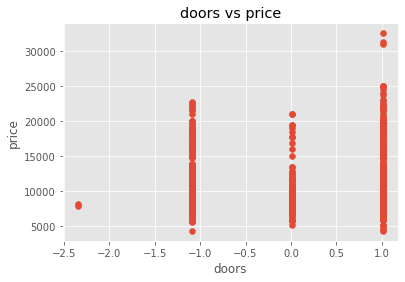

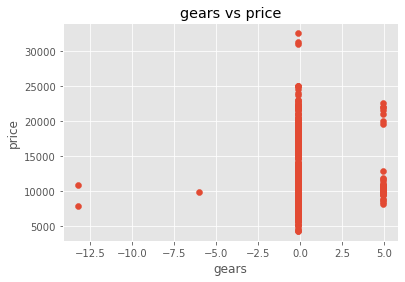

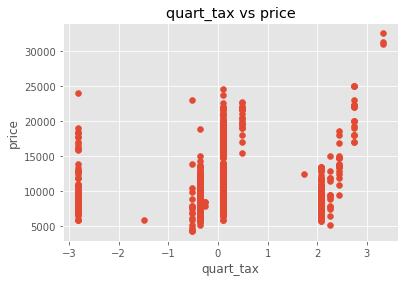

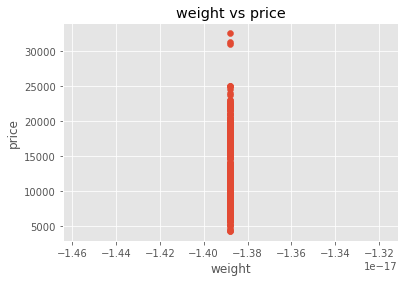

In [222]:
y_col = "price"
x_columns = ["age", "km", "hp","cc","doors","gears","quart_tax","weight"]


for y_col in x_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_bc[y_col], df_bc[x_col])
    ax.set_xlabel(y_col)
    ax.set_ylabel(x_col)
    ax.set_title("{} vs {}".format(y_col, x_col))

    
    plt.show()

In [346]:
model_bc = smf.ols('price~age+km+hp+cc+doors+gears+quart_tax+weight',data=df_bc).fit()

In [347]:
print(model_bc.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     752.0
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:42:39   Log-Likelihood:                -12686.
No. Observations:                1435   AIC:                         2.539e+04
Df Residuals:                    1427   BIC:                         2.543e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.073e+04     44.261    242.419      0.0

### <font color='brown'><b><I>with Yeo-Jhonson Transformation :

In [348]:
column_trans = ColumnTransformer(
    [('age', PowerTransformer(method='yeo-johnson', standardize=True), ['age']),
     ('km', PowerTransformer(method='yeo-johnson', standardize=True), ['km']),
     ('hp', PowerTransformer(method='yeo-johnson', standardize=True), ['hp']),
     ('cc', PowerTransformer(method='yeo-johnson', standardize=True), ['cc']),
     ('doors', PowerTransformer(method='yeo-johnson', standardize=True), ['doors']),
     ('gears', PowerTransformer(method='yeo-johnson', standardize=True), ['gears']),
     ('quart_tax', PowerTransformer(method='yeo-johnson', standardize=True), ['quart_tax']),
     ('weight', PowerTransformer(method='yeo-johnson', standardize=True), ['weight']),
    ])

transformed_yeojohnson = column_trans.fit_transform(df2)

df_yj = pd.DataFrame(transformed_yeojohnson, columns=x.columns)

df_yj.head()

,age,km,hp,cc,doors,gears,quart_tax,weight
0,-1.669408,-0.481709,-0.758405,1.859006,-1.087561,-0.127106,2.433233,2.525757e-15
1,-1.669408,0.245265,-0.758405,1.859006,-1.087561,-0.127106,2.433233,2.525757e-15
2,-1.636467,-0.650571,-0.758405,1.859006,-1.087561,-0.127106,2.433233,2.525757e-15
3,-1.567771,-0.450265,-0.758405,1.859006,-1.087561,-0.127106,2.433233,2.525757e-15
4,-1.419413,-0.758190,-0.758405,1.859006,-1.087561,-0.127106,2.433233,2.636780e-15


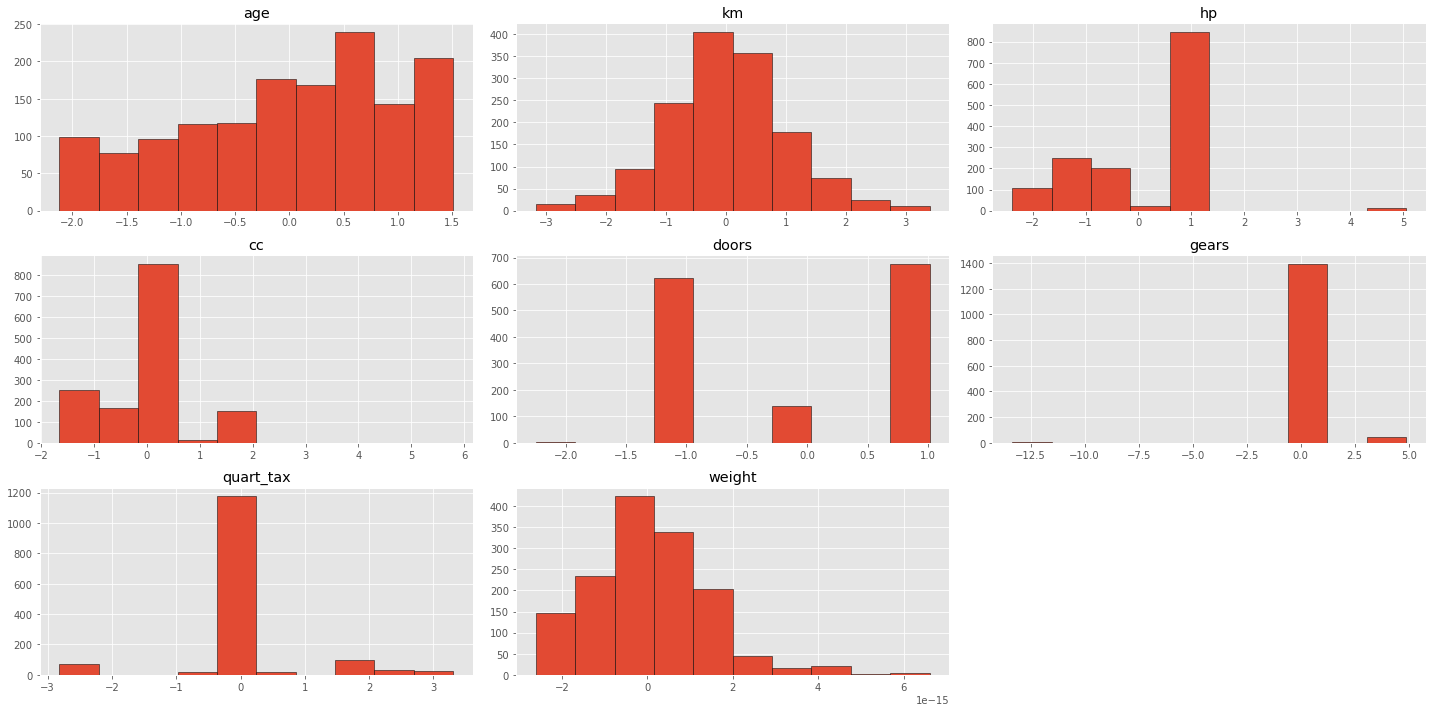

In [349]:
df_yj.hist(edgecolor='k',figsize=(20,10))
plt.tight_layout();

In [350]:
df_yj = df_yj.join(y)
df_yj.head()

,age,km,hp,cc,doors,gears,quart_tax,weight,price
0,-1.669408,-0.481709,-0.758405,1.859006,-1.087561,-0.127106,2.433233,2.525757e-15,13500
1,-1.669408,0.245265,-0.758405,1.859006,-1.087561,-0.127106,2.433233,2.525757e-15,13750
2,-1.636467,-0.650571,-0.758405,1.859006,-1.087561,-0.127106,2.433233,2.525757e-15,13950
3,-1.567771,-0.450265,-0.758405,1.859006,-1.087561,-0.127106,2.433233,2.525757e-15,14950
4,-1.419413,-0.758190,-0.758405,1.859006,-1.087561,-0.127106,2.433233,2.636780e-15,13750


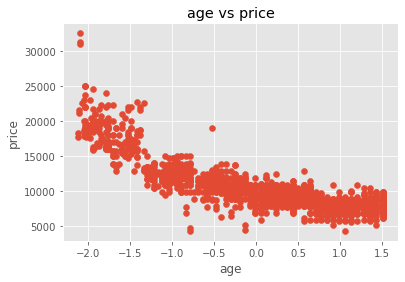

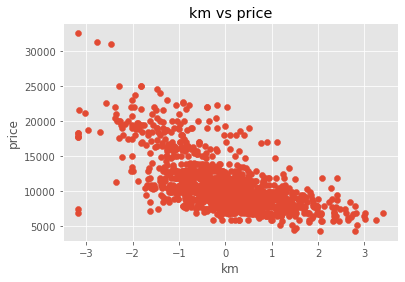

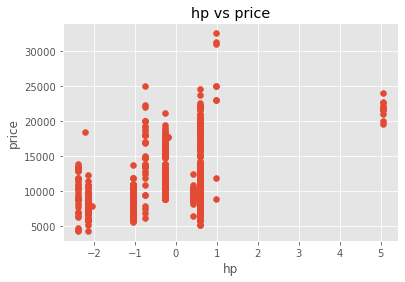

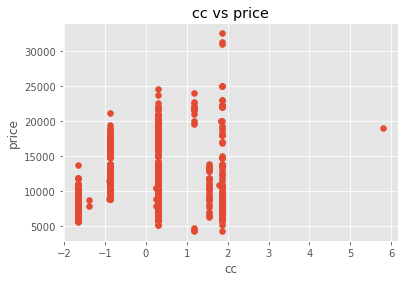

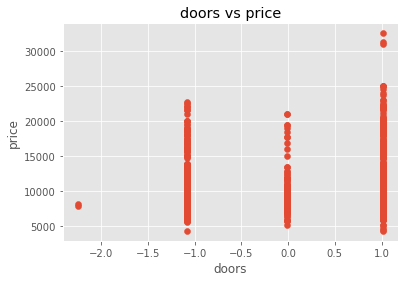

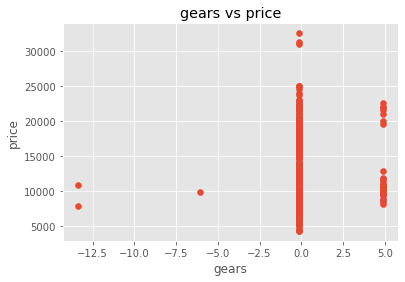

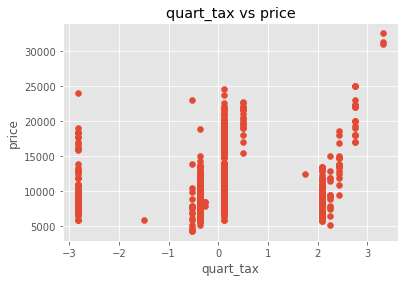

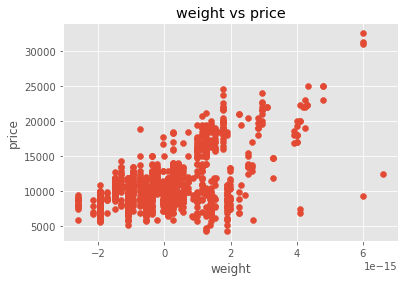

In [95]:
y_col = "price"
x_columns = ["age", "km", "hp","cc","doors","gears","quart_tax","weight"]


for y_col in x_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_yj[y_col], df_yj[x_col])
    ax.set_xlabel(y_col)
    ax.set_ylabel(x_col)
    ax.set_title("{} vs {}".format(y_col, x_col))

    
    plt.show()

In [351]:
model_yj = smf.ols('price~age+km+hp+cc+doors+gears+quart_tax+weight',data=df_yj).fit()

In [352]:
print(model_yj.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     748.7
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:45:01   Log-Likelihood:                -12700.
No. Observations:                1436   AIC:                         2.542e+04
Df Residuals:                    1428   BIC:                         2.546e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.073e+04     44.398    241.699      0.0

### <font color='brown'><b><I>with Quantile Transformation :

In [353]:
x_q = x_l.copy()

In [354]:
from sklearn.preprocessing import QuantileTransformer

def unique_values(x):
    return x.unique().tolist()

qt = QuantileTransformer()
    
transformed_qt = qt.fit_transform(x_q)

df_q = pd.DataFrame(transformed_qt, columns=x.columns)

df_q.head()

,age,km,hp,cc,doors,gears,quart_tax,weight
0,0.080080,0.294281,0.261762,1.0,0.218218,0.486486,0.978478,0.959960
1,0.080080,0.606623,0.261762,1.0,0.218218,0.486486,0.978478,0.959960
2,0.083584,0.241242,0.261762,1.0,0.218218,0.486486,0.978478,0.959960
3,0.092593,0.308228,0.261762,1.0,0.218218,0.486486,0.978478,0.959960
4,0.118118,0.209195,0.261762,1.0,0.218218,0.486486,0.978478,0.964464


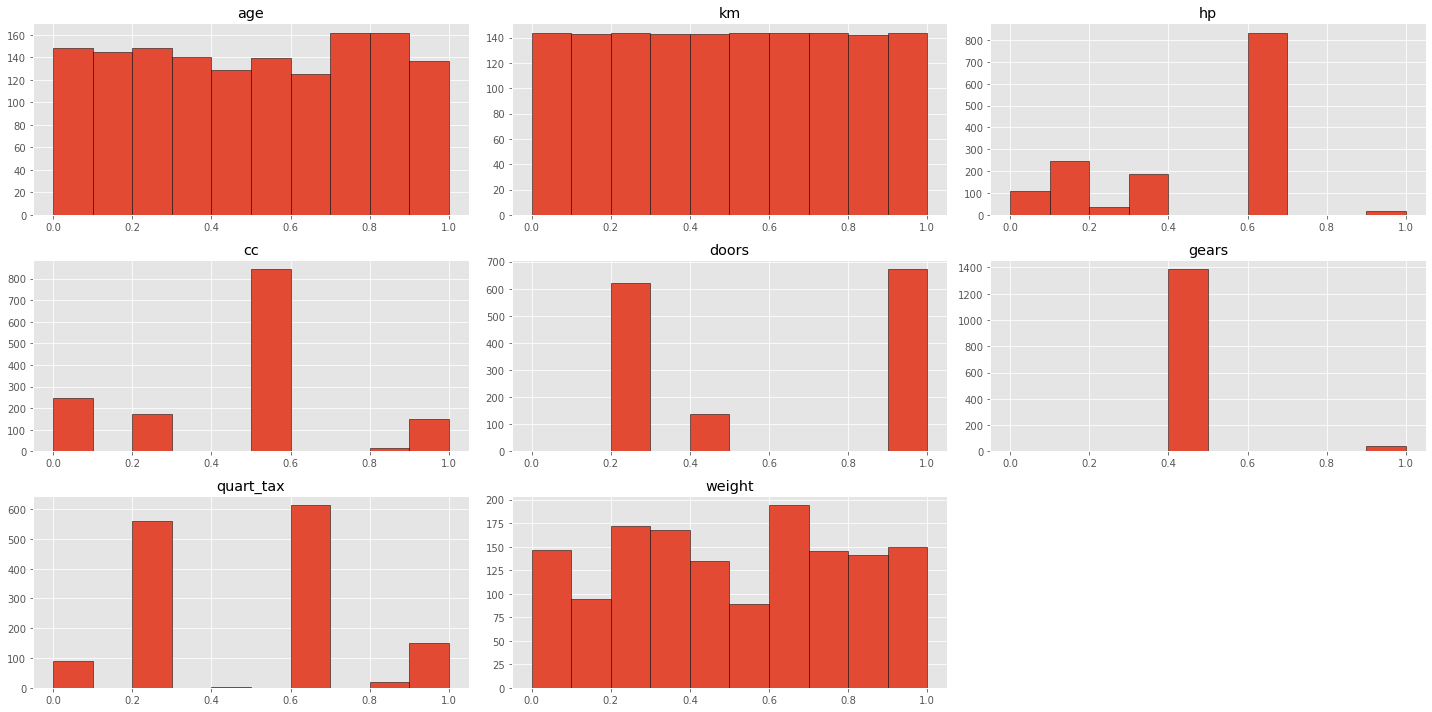

In [355]:
df_q.hist(edgecolor='k',figsize=(20,10))
plt.tight_layout();

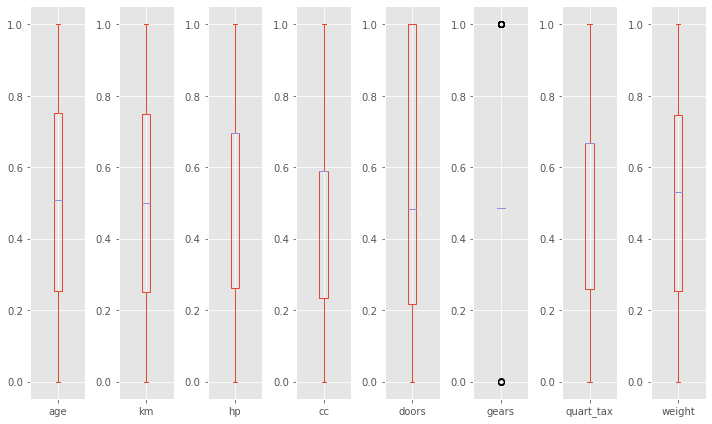

In [356]:
df_q.plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout();

In [365]:
df_q = df_q.join(y)

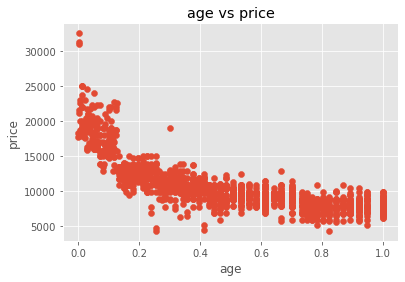

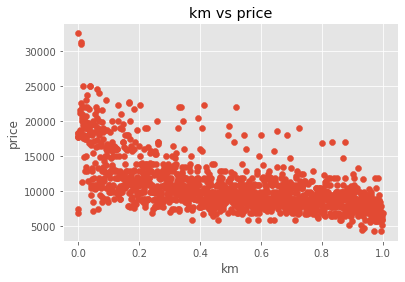

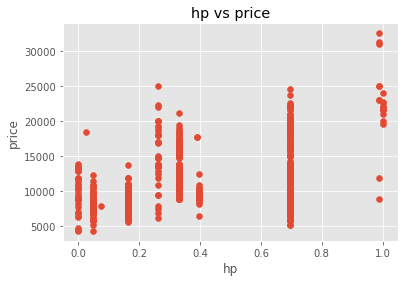

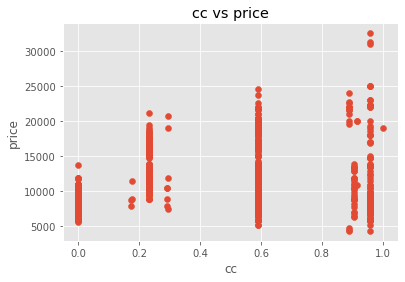

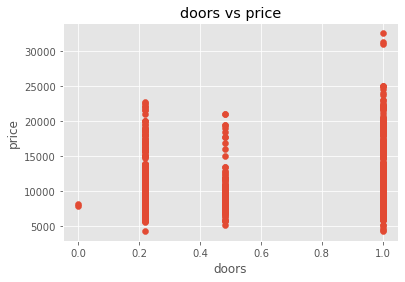

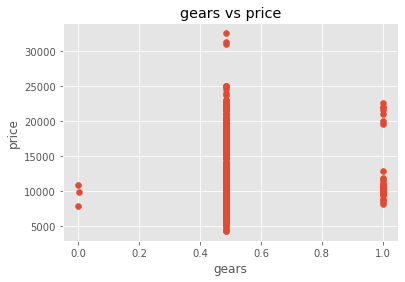

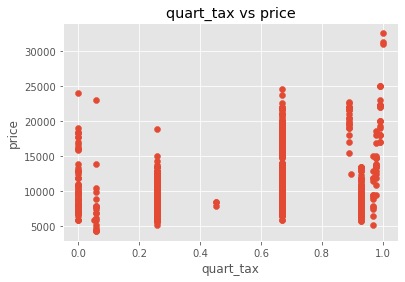

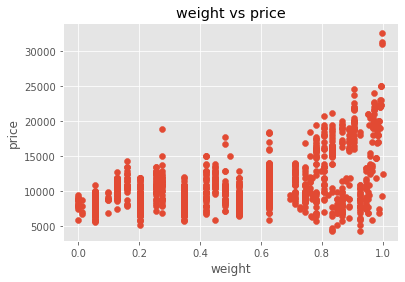

In [201]:
y_col = "price"
x_columns = ["age", "km", "hp","cc","doors","gears","quart_tax","weight"]


for y_col in x_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_q[y_col], df_q[x_col])
    ax.set_xlabel(y_col)
    ax.set_ylabel(x_col)
    ax.set_title("{} vs {}".format(y_col, x_col))

    
    plt.show()

In [366]:
model_q = smf.ols('price~age+km+hp+cc+doors+gears+quart_tax+weight',data=df_q).fit()

In [358]:
print(model_q.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     528.7
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:46:22   Log-Likelihood:                -12818.
No. Observations:                1436   AIC:                         2.565e+04
Df Residuals:                    1427   BIC:                         2.570e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.267e+04    327.949     38.643      0.0

### <font color='brown'><b><I>with Log Transformation :

In [359]:
model_log = smf.ols('np.log(price)~np.log(age+km+hp+cc+doors+gears+quart_tax+weight)',data=df_c).fit()

In [360]:
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1082.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          3.10e-177
Time:                        03:46:36   Log-Likelihood:                 115.40
No. Observations:                1435   AIC:                            -226.8
Df Residuals:                    1433   BIC:                            -216.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### <font color='brown'><b><I>with Squareroot Transformation :

In [361]:
model_sqrt = smf.ols('np.sqrt(price)~np.sqrt(age+km+hp+cc+doors+gears+quart_tax+weight)',data=df_c).fit()

In [362]:
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:         np.sqrt(price)   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1007.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          7.50e-168
Time:                        03:46:50   Log-Likelihood:                -5639.5
No. Observations:                1435   AIC:                         1.128e+04
Df Residuals:                    1433   BIC:                         1.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### <font color='brown'><b><I>with Cuberoot Transformation :

In [363]:
model_cbrt = smf.ols('np.cbrt(price)~np.cbrt(age+km+hp+cc+doors+gears+quart_tax+weight)',data=df_c).fit()

In [364]:
print(model_cbrt.summary())

                            OLS Regression Results                            
Dep. Variable:         np.cbrt(price)   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     1086.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          8.83e-178
Time:                        03:47:01   Log-Likelihood:                -2786.5
No. Observations:                1435   AIC:                             5577.
Df Residuals:                    1433   BIC:                             5588.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## <font color='orange'><b>Summarizing the Results :

In [367]:
data = {'MLR models':['with Raw data','After removing influencers','Lasso Regression','with Box-Cox Transformation',
                      'with Yeo-Jhonson Transformation','with Quantile Transformation','with Log Transformation',
                      'with Squareroot Transformation','with Cuberoot Transformation'],
       'R-squared':[model_raw.rsquared,model_infl.rsquared,r_squared,model_bc.rsquared,
                    model_yj.rsquared,model_q.rsquared,model_log.rsquared,
                    model_sqrt.rsquared,model_cbrt.rsquared],
       'Adj.R-squared':[model_raw.rsquared_adj,model_infl.rsquared_adj,adj_r2,model_bc.rsquared_adj,
                        model_yj.rsquared_adj,model_q.rsquared_adj,
                        model_log.rsquared_adj,model_sqrt.rsquared_adj,model_cbrt.rsquared_adj]}
Models = pd.DataFrame(data)
Models.sort_values('Adj.R-squared',ascending=False).reset_index(drop=True)

,MLR models,R-squared,Adj.R-squared
0,After removing influencers,0.872447,0.871731
1,with Raw data,0.863763,0.862999
2,Lasso Regression,0.855459,0.854649
3,with Box-Cox Transformation,0.786732,0.785686
4,with Yeo-Jhonson Transformation,0.785878,0.784828
5,with Quantile Transformation,0.693148,0.691426
6,with Cuberoot Transformation,0.431179,0.430782
7,with Log Transformation,0.430182,0.429784
8,with Squareroot Transformation,0.412754,0.412344


<font color='maroon'><b>From above table, the model after removing influencers and without any transformation applied has the highest R-squared and Adjusted R-squared values.